In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor   


In [2]:
df1 = pd.read_csv('/Users/floris/Desktop/DSS/Thesis/dataset_for_machine_learning.csv')

In [3]:
df = pd.read_csv('dataset_for_machine_learning.csv')

# Convert the date columns to datetimeint
df['DatumFileBeginInt'] = df['DatumFileBeginInt'].str.replace('-', '').astype(int)

# Define the road section researched
df = df[df['RouteOms']== 'A4']

#  Remove duplicate columns and unnecessary columns
columns_to_remove = ['RouteOms', 'latitude_x', 'longitude_x', 'provincie_x', 'latitude_y', 
                     'longitude_y', 'RouteLet', 'GemLengte', 'FileDuur', 'NLSitNummer',
                    'RouteNum', 'RouteLet_encoded', 'HectometerStaart', 'DatumFileBeginInt', 
                    'station_code', 'DatumTijdFileEind'
]

df = df.drop(columns=columns_to_remove)

df['DatumTijdFileBegin'] = pd.to_datetime(df['DatumTijdFileBegin']) 

# Define target column to drop
columns_to_drop = ['FileZwaarte', 'DatumTijdFileBegin']


Test MAE: 28.3237463081063
Test MSE: 2132.3279533335904
Test R2: 0.12577508234034473


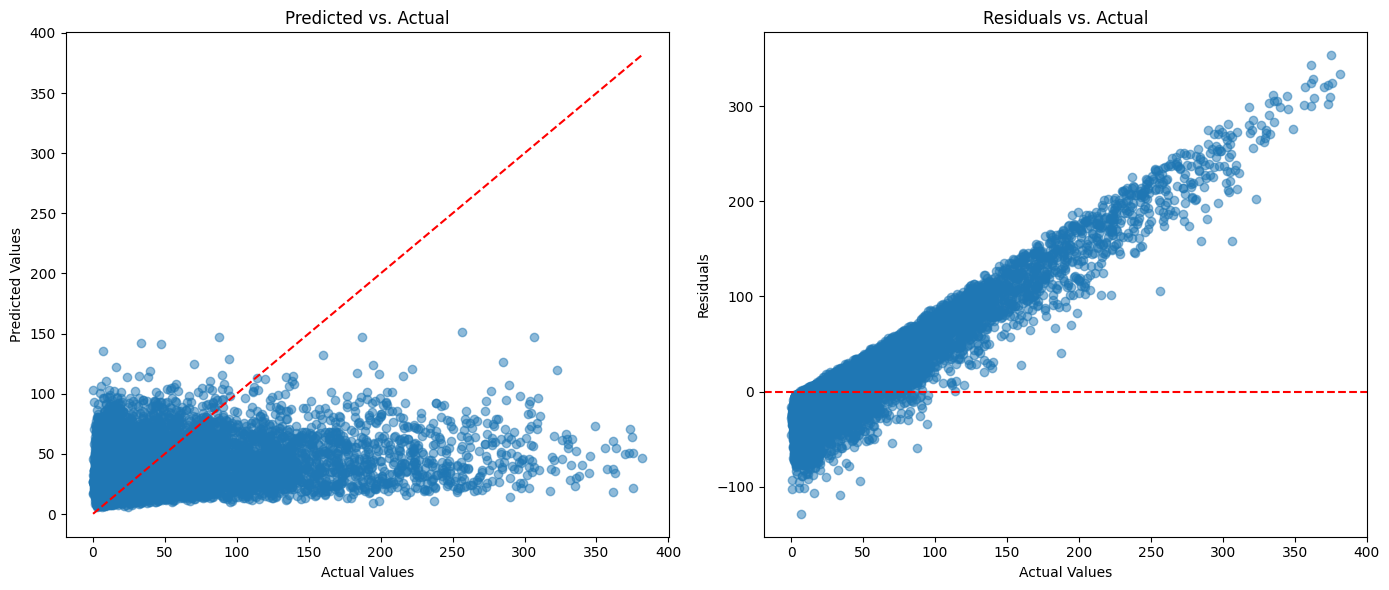

In [4]:
X = df.drop(columns=columns_to_drop)
y = df['FileZwaarte']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that scales the data then applies RandomForestRegressor
pipeline = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(
        n_estimators=100, 
        max_features='sqrt', 
        max_depth=20, 
        min_samples_split=10, 
        min_samples_leaf=4, 
        random_state=42
    )
)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model on the test set
test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")
print(f"Test R2: {test_r2}")

# Calculate residuals
residuals = y_test - y_pred

# Plot Predicted vs. Actual
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual')

# Plot Residuals vs. Actual
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual')

plt.tight_layout()
plt.show()

Test MAE: 28.011385591110933
Test MSE: 2086.8449947419695
Test R2: 0.14442246520071322


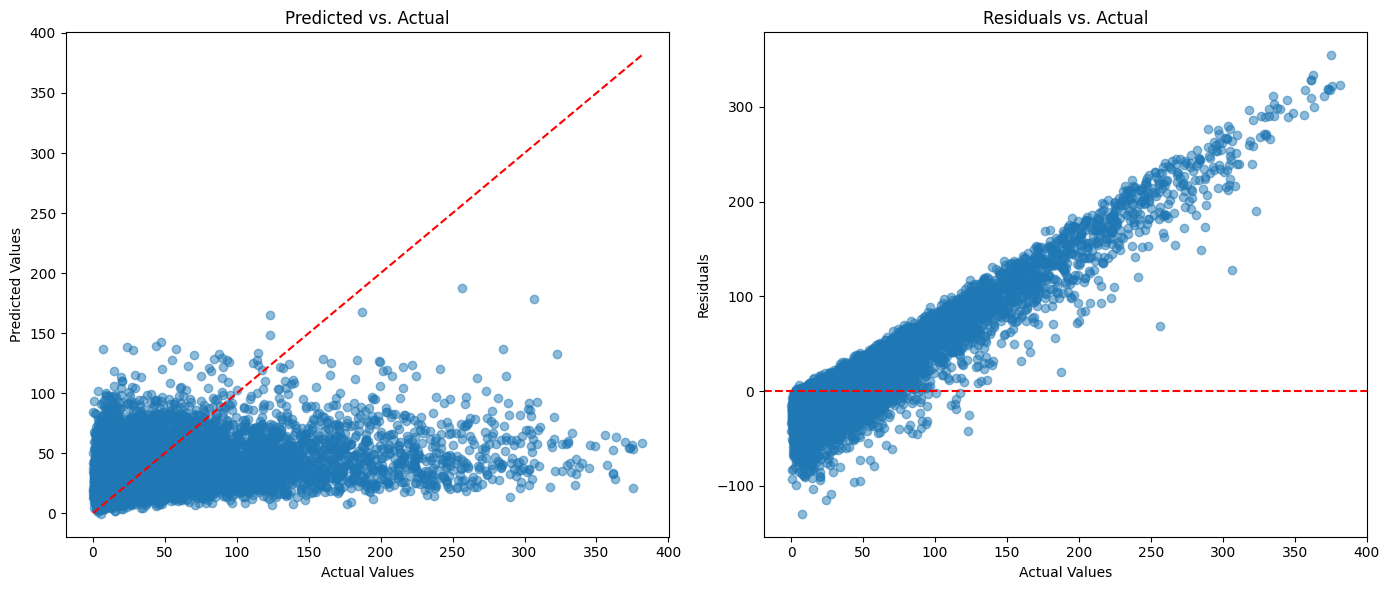

In [5]:
X = df.drop(columns=columns_to_drop)
y = df['FileZwaarte']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that scales the data then applies XGBRegressor
pipeline = make_pipeline(
    StandardScaler(),
    XGBRegressor(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        subsample=1.0,
        colsample_bytree=1.0,
        min_child_weight=9,
        random_state=42
    )
)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model on the test set
test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")
print(f"Test R2: {test_r2}")

# Calculate residuals
residuals = y_test - y_pred

# Plot Predicted vs. Actual
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual')

# Plot Residuals vs. Actual
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual')

plt.tight_layout()
plt.show()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3081
[LightGBM] [Info] Number of data points in the train set: 68761, number of used features: 39
[LightGBM] [Info] Start training from score 31.443126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

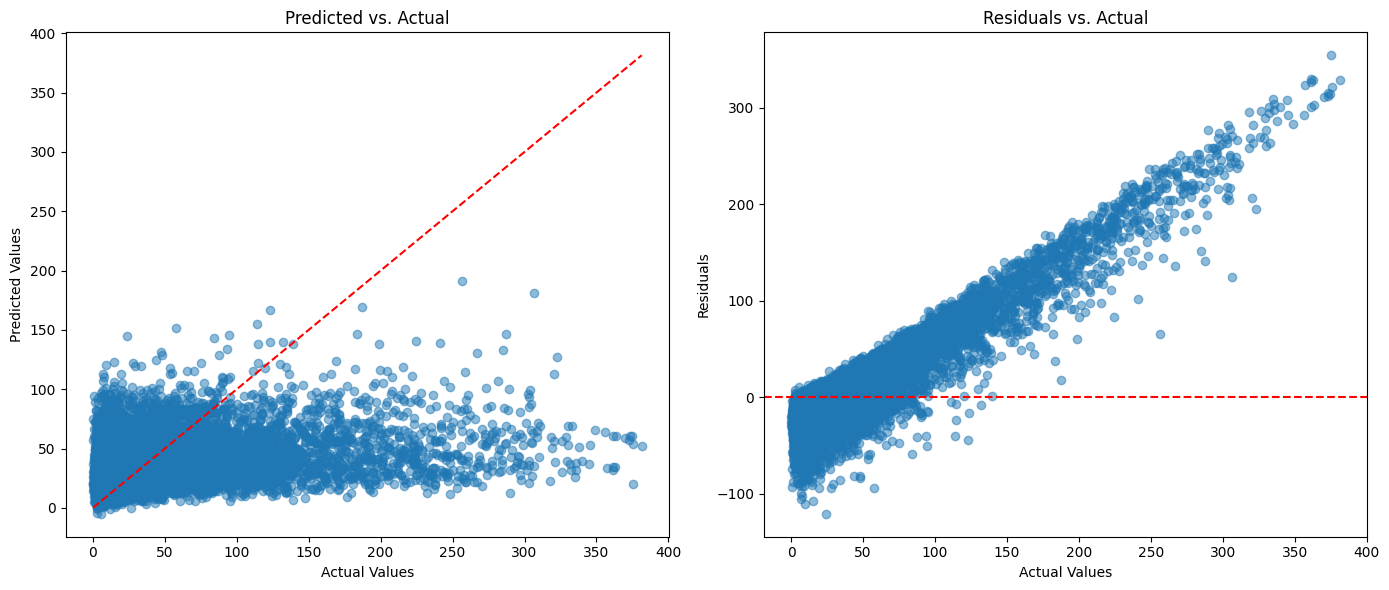

In [6]:
X = df.drop(columns=columns_to_drop) 
y = df['FileZwaarte']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that scales the data then applies LGBMRegressor
pipeline = make_pipeline(
    StandardScaler(),
    LGBMRegressor(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.7,
        colsample_bytree=0.7,
        min_child_weight=1,
        random_state=42
    )
)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model on the test set
test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")
print(f"Test R2: {test_r2}")

# Calculate residuals
residuals = y_test - y_pred

# Plot Predicted vs. Actual
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual')

# Plot Residuals vs. Actual
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual')

plt.tight_layout()
plt.show()